In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper_functions as hf

In [3]:
%matplotlib inline  

Read the data into a dataframe

In [4]:
major_conferences = pd.read_csv('../data/major_conferences.csv')

/Users/AngelaBeckham/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Create Columns for zone%, swing%, z_swing%, and o_swing%

In [5]:
major_conferences['zone%'] = [np.NaN]*major_conferences.index.size
for ind in major_conferences.index:
    major_conferences['zone%'][ind] = hf.zone(major_conferences['Plate Loc Side'][ind], major_conferences['Plate Loc Height'][ind])

/Users/AngelaBeckham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
major_conferences['swing%'] = major_conferences['Pitch Call'].apply(hf.swing)

In [8]:
major_conferences['z_swing%'] = [np.NaN]*major_conferences.index.size
major_conferences['o_swing%'] = [np.NaN]*major_conferences.index.size
for i in major_conferences.index:
    if major_conferences['zone%'][i] == 1:
        if major_conferences['swing%'][i] == 1:
            major_conferences['z_swing%'][i] = 1
        else:
            major_conferences['z_swing%'][i] = 0
    else:
        if major_conferences['swing%'][i] == 1:
            major_conferences['o_swing%'][i] = 1
        else:
            major_conferences['o_swing%'][i] = 0

/Users/AngelaBeckham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/AngelaBeckham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/AngelaBeckham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back 

Create an array for valid innings

In [9]:
innings = major_conferences['Inning'].unique()
innings.sort()
innings = innings[(innings >= 1) & (innings <= 9)]

Create a dictionary of dataframes to hold data for swing rates against different pitch types

In [10]:
pitches = ['Fastball', 'Slider', 'Curveball', 'ChangeUp']
pitch_dict = {'All': '',
             'Fastball': '',
             'Slider': '',
             'Curveball': '',
             'ChangeUp': ''}
for key in pitch_dict.keys():
    cur_df = pd.DataFrame(index = innings, columns = ['swing%', 'z_swing%', 'o_swing%'])
    cur_data = major_conferences.copy()
    if key != 'All':
        cur_data = cur_data[cur_data['Tagged Pitch Type'] == key]
    for i in cur_df.index:
        inning_df = cur_data[cur_data['Inning'] == i]
        for col in cur_df.columns:
            cur_df[col][i] = inning_df[col].mean()
    pitch_dict[key] = cur_df

Create a graph showing changes in swing rate, zone swing rate, and reach rate over the course of a game

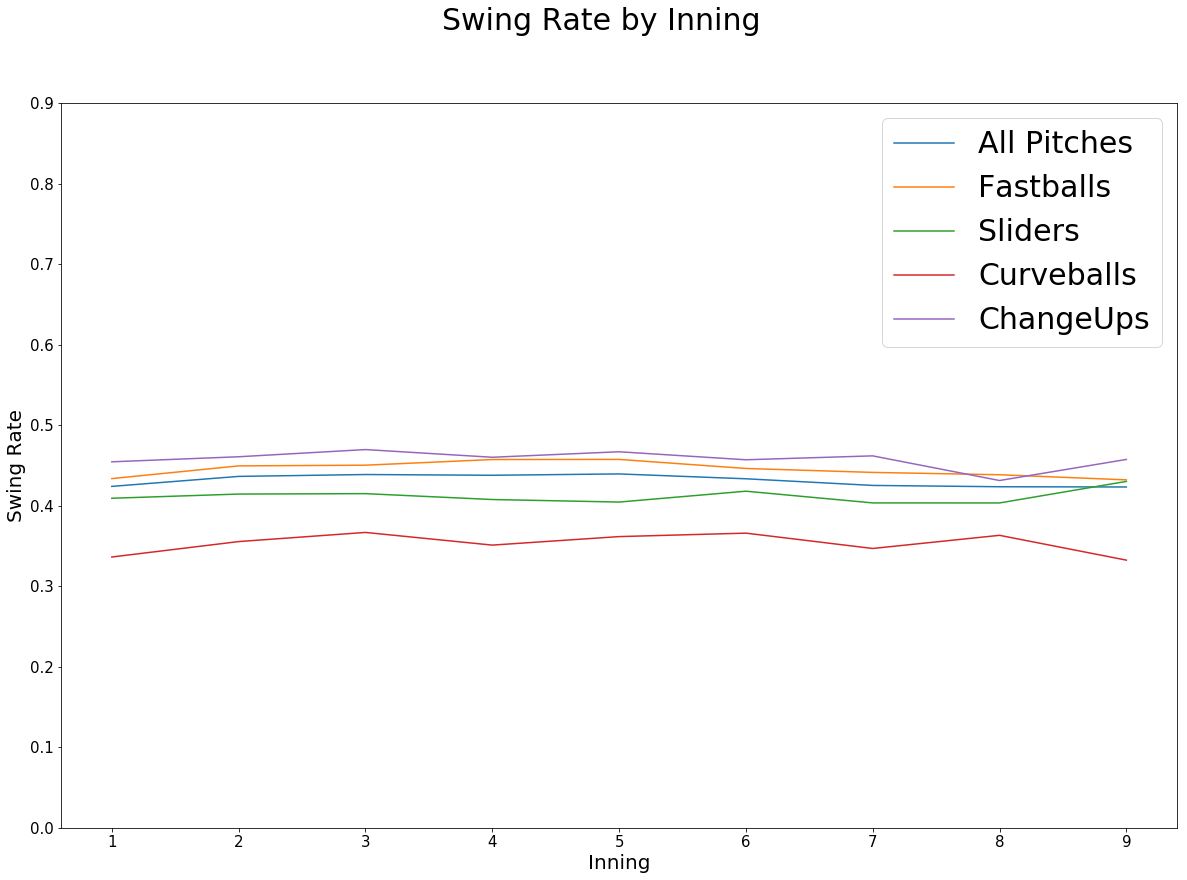

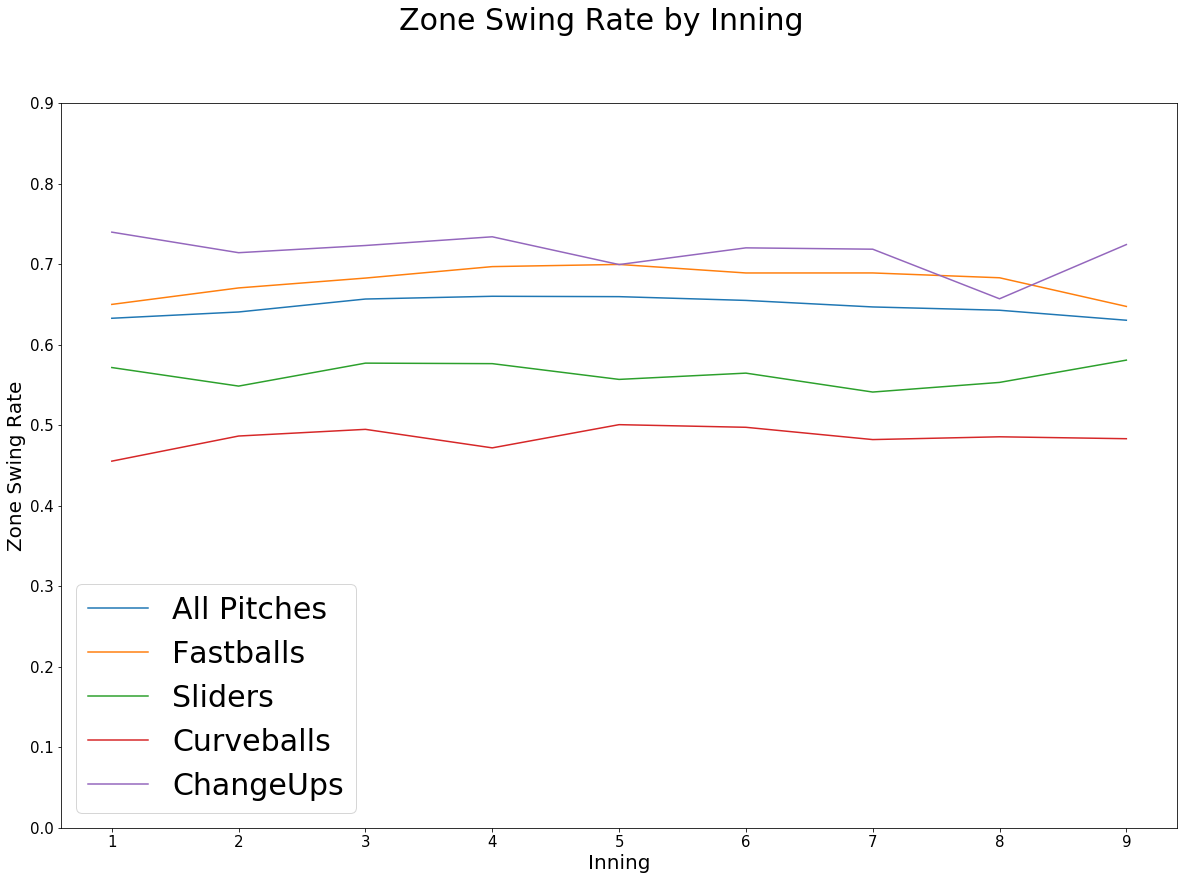

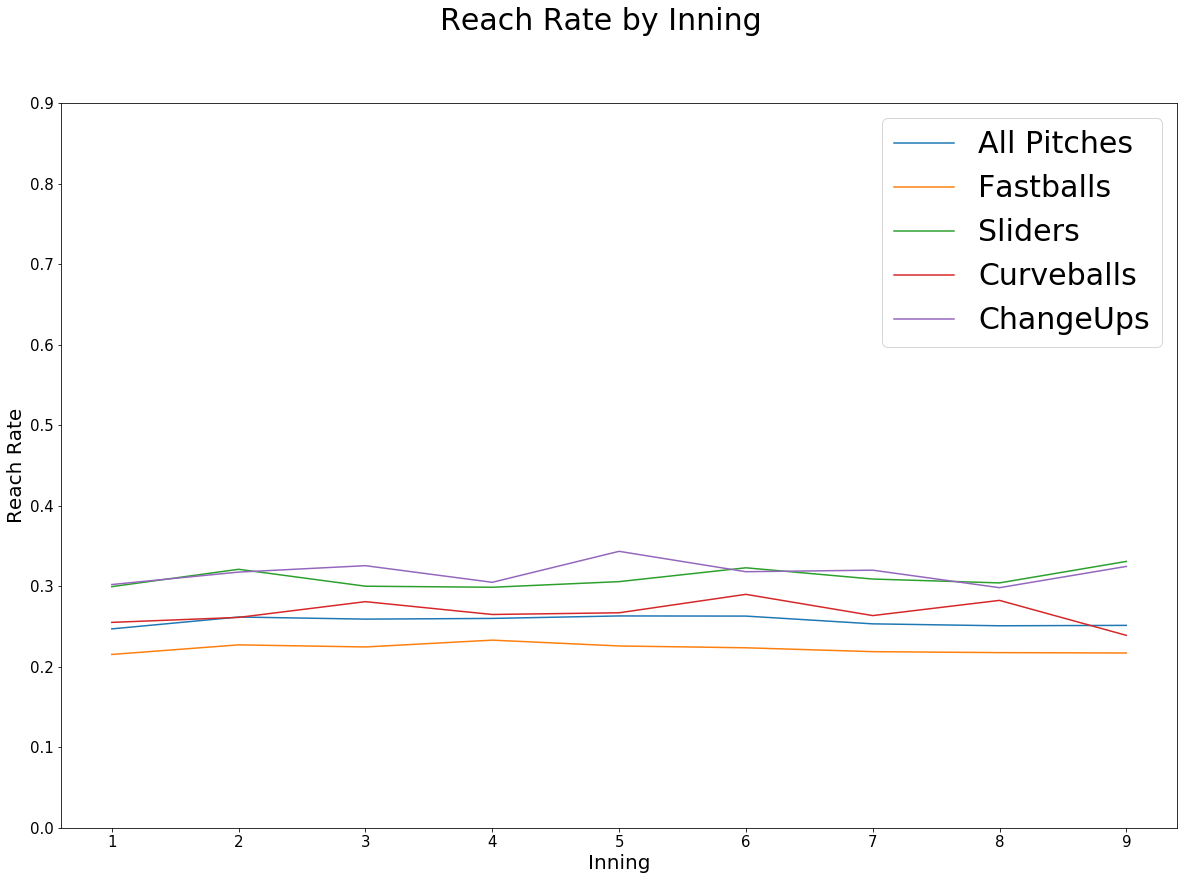

In [13]:
n = 1
for col in pitch_dict['All'].columns:
    swing_rate = plt.figure(num = n, figsize = [20, 13.333])
    title = hf.get_title(col)
    swing_rate.suptitle(title, fontsize = 30)
    types, = plt.plot(pitch_dict['All'].index, pitch_dict['All'][col], label = 'All Pitches')
    fastball, = plt.plot(pitch_dict['Fastball'].index, pitch_dict['Fastball'][col], label = 'Fastballs')
    slider, = plt.plot(pitch_dict['Slider'].index, pitch_dict['Slider'][col], label = 'Sliders')
    curveball, = plt.plot(pitch_dict['Curveball'].index, pitch_dict['Curveball'][col], label = 'Curveballs')
    changeup, = plt.plot(pitch_dict['ChangeUp'].index, pitch_dict['ChangeUp'][col], label = 'ChangeUps')
    plt.xlabel('Inning', fontsize = 20)
    label = hf.get_label(col)
    plt.ylabel(label, fontsize = 20)
    plt.xticks(np.arange(1.0, 10.0, 1), size = 15)
    plt.yticks(np.arange(0, 1.0, .1), size = 15)
    plt.legend([types, fastball, slider, curveball, changeup], ['All Pitches', 'Fastballs', 'Sliders','Curveballs','ChangeUps'], prop={'size': 30})
    file_name = hf.get_file(col)
    plt.savefig(file_name)
    n += 1